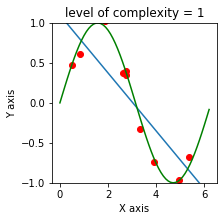

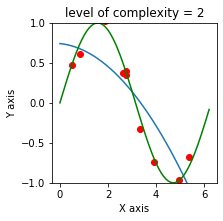

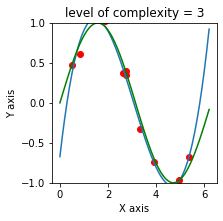

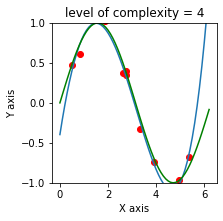

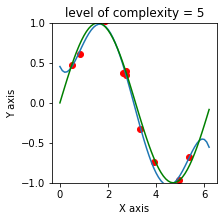

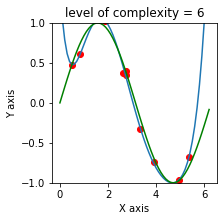

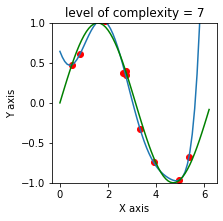

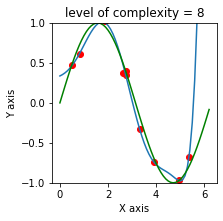

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#making sure the data generated is always the same
np.random.seed(2)

x = []
t = []
eta = []
risk_array = []
pi = np.pi
x_cont = np.arange(0, 2*np.pi, 0.1)
amplitude = np.sin(x_cont)

for i in range(10):
    x.append(2*pi*np.random.random_sample())
    eta.append(np.random.normal(0, 0.1))

t = np.sin(x) + eta

#converting tuples into array
x = np.array([x])
t = np.array([t])

x = x.transpose()
t = t.transpose()


def riskFunction(y, t, n):
    loss = 0
    for i in range(0,n,1):
        loss = loss + (y(x[i]) - t[i])**2
    return loss / n


#level of complexity from 1 to 8
for p in range(1,9,1):
    phi = np.ones((10, 1))
    for i in range(1,p+1,1):
        f = np.power(x,i)
        phi = np.hstack((phi, f))

    inv = np.linalg.pinv(np.matmul(phi.transpose(),phi))
    inv_p = np.matmul(inv, phi.transpose())

    # compute the coefficients
    w_opt = np.matmul(inv_p, t)
    #reversing the array
    w_opt = w_opt[::-1]
    w_opt = w_opt.reshape((p+1,))
    w_opt_list = list(w_opt)
    fig = plt.figure(figsize=(10,10))

    ## polynomial

    poli = np.poly1d(w_opt_list[:])
    ax = fig.add_subplot(3, 3, p)
    plt.ylim((-1,1))
    plt.title('level of complexity = '+str(p))
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.plot(x_cont, poli(x_cont))
    plt.plot(x_cont, amplitude, c='g')
    plt.scatter(x,t, c='r')
    #plt.savefig('sample'+str(p)+'.pdf')
    risk = riskFunction(poli, t, 10)
    risk_array.append(risk)

In [4]:
risk_array

[array([0.11358558]),
 array([0.09546982]),
 array([0.00619846]),
 array([0.00537187]),
 array([0.0023179]),
 array([0.00095748]),
 array([0.00095527]),
 array([0.00115742])]

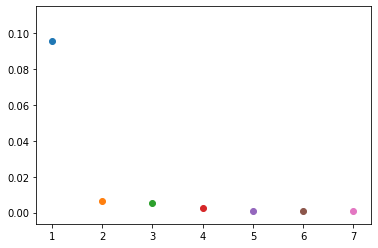

In [6]:
for i in range(1,p,1):
    plt.scatter(i, risk_array[i])
plt.plot()
plt.savefig('risk2.pdf')